## Домашнее задание 27
### Козел А.Г. 22.02.2023
https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/ 
* ДЗ - оценить возраст человека по изображению. В качестве датасета возьмите датасет только лиц. 
Предположим что сами лица вы находить и извлекать уже умеете. Можете сделать это как продолжение решения по поиску лиц из предыдущих работ.
https://www.google.com/amp/s/www.geeksforgeeks.org/age-detection-using-deep-learning-in-opencv/amp/ пример того как это может работать.  
В качестве фьючеэкстрактора берите любую современную нейронную сеть. Задачу можно решать как задачу регрессии или классификации.  14 14-18 
Если есть время можете попробовать 2 способа.  Попробуйте разблокировать часть слоев после обучения и дообучить модель.



 
0-14 14-18 18-21 21-


Указание -  что бы решить задачу регресси вам нужно использовать flow_from_dataframe
Указание - для начала вам нужно создать датафрейм в котором будет относительный путь к изображению и целевая метка, потом использовать этот датафрейм при обучении

	

In [1]:
import sys
import sklearn
import tensorflow as tf
import numpy as np
import os
import random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from imutils import face_utils
import imutils
import dlib
import pandas as pd
from sklearn import metrics
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding, Dropout


In [2]:
tf.__version__
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = 'c:\\Users\\37533\\Desktop\\jupyter\\ДЗ_28\\data_'

In [49]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
face = 0 # счетчик изображений с лицами
no_face = 0 #счетчик изображений без лиц
no_read = 0 # счетчик нечитаемых изображений

df = pd.DataFrame(columns=['link', 'age'])
for folder in tqdm(os.listdir('./data_')):
    for file in os.listdir(os.path.join(data, folder)):
        try:
            link = os.path.join(data, folder, file)
            img = Image.open(link)  # загрузить изображение
            image = face_recognition.load_image_file(os.path.join(data, folder, file))
            if len(face_recognition.face_landmarks(image)) == 1:
                face +=1
                #определяем возраст
                name = file[:-4] #убираем расширение файла из имени
                age_end = name.split('_')[2] # делаем сплит по нижнему подчеркиванию и выбираем последнюю дату
                age_start=str(name.split('_')[1]).split('-')[0] # делаем сплит, выбираем первую дату и далаем сплит по дефису, 
                                                            # выбираем год.
                age_fin = int(age_end)-int(age_start) #Вычисляем возраст
            
                if age_fin>100 or age_fin<0: # Если возраст больше 100 или меньше 0, то выкидываем из набора
                    continue
             
            else:
                no_face +=1
            #формируем временный датафрейм
            dat = pd.DataFrame({"link": [link],
                                "age": [age_fin]})
               #Делаем конкатенацию с основным датафреймом.
            df = pd.concat([df,dat])
            
        except:
            no_read+=1
            None 
        
print(f'Изображения с лицами {face}')
print(f'Изображения без лиц {no_face}')
print(f'Нечитаемые изображения {no_read}')

df.to_csv('data_cleaned.csv') #Сохраним в файл полученный Dataframe на случай перезагрузки, чтобы не чистить второй раз )))

100%|██████████| 100/100 [2:13:46<00:00, 80.26s/it]  


Изображения с лицами 38870
Изображения без лиц 23458
Нечитаемые изображения 0


In [10]:
face1 = 0 # счетчик изображений с лицами
no_face1 = 0 #счетчик изображений без лиц


df1 = pd.DataFrame(columns=['link', 'age'])
for folder in tqdm(os.listdir('./data_')):   
    for file in os.listdir(os.path.join(data, folder)):
        link = os.path.join(data, folder, file) 
        img = Image.open(link)  # загрузить изображение
        image = face_recognition.load_image_file(os.path.join(data, folder, file))
        if len(face_recognition.face_landmarks(image)) == 1:
            face1 +=1 #если 1 лицо найдено, добавляем +1
                #определяем возраст
            name = file[:-4] #убираем расширение файла из имени
            age_end = name.split('_')[2] # делаем сплит по нижнему подчеркиванию и выбираем последнюю дату
            age_start=str(name.split('_')[1]).split('-')[0] # делаем сплит, выбираем первую дату и далаем сплит по дефису, 
                                                            # выбираем год.
            age_fin = int(age_end)-int(age_start) #Вычисляем возраст
            
            if age_fin>100 or age_fin<0:# Если возраст больше 100 или меньше 0, то выкидываем из набора
                continue
            dat = pd.DataFrame({"link": [link],
                             "age": [age_fin]})
               #Делаем конкатенацию с основным датафреймом.
            df1 = pd.concat([df1,dat])
             
        else:
            no_face1 +=1
            #формируем временный датафрейм
        
        
print(f'Изображения с лицами {face1}')
print(f'Изображения без лиц {no_face1}')


df1.to_csv('data_face.csv') #Сохраним в файл полученный Dataframe 

100%|██████████| 100/100 [50:58<00:00, 30.59s/it]

Изображения с лицами 38870
Изображения без лиц 23458


In [12]:
df1.head(5)

,link,age
0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,67
0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,27
0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,46
0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,43
0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,48


In [33]:
df1.nunique()

link    38820
age       101
dtype: int64

In [41]:
df1['age']=df1['age'].astype(int)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38820 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   link    38820 non-null  object
 1   age     38820 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.7+ MB


In [44]:
df1['age'].value_counts()

26    1612
24    1561
27    1519
23    1488
25    1478
      ... 
3        3
98       3
5        1
2        1
4        1
Name: age, Length: 101, dtype: int64

In [46]:
print(df1.shape)
df1['age'].describe(include = "all").T

(38820, 2)


count    38820.000000
mean        38.340752
std         16.608884
min          0.000000
25%         25.000000
50%         33.000000
75%         49.000000
max        100.000000
Name: age, dtype: float64

In [52]:

data = pd.read_csv ('data_face.csv')

AttributeError: 'int' object has no attribute 'read'

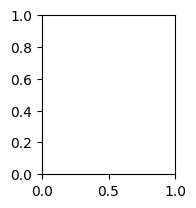

In [53]:
idx = np.random.randint (0,len(data),25)
plt.figure(figsize=(10,12))
for idx in enumerate(idx):
    plt.subplot (5,5,idx[0]+1)
    link = df.iloc[idx[1]]
    image = plt.imread(link[1])
    title = 'Age - ' + str(link[2])
    plt.title (title)
    plt.imshow(image, cmap='gray');
    